In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import flopy

import config

In [2]:
print(config.mfexe)

/Users/jdhughes/Documents/Training/SWIM2016Course/bin/mf2005.mac


In [3]:
# create a model object
# modflow - dis, bas, lpf, pcg, oc, wel`
ml = flopy.modflow.Modflow(modelname='model1', 
                           exe_name=config.mfexe, 
                           model_ws='./work')


In [4]:
# nlay = 2, nrow = 101, ncol = 101, delr = delc = 100
# each layer = 20 m
nlay = 2
ncol = 101
nrow = 101
dis = flopy.modflow.ModflowDis(ml, nlay=nlay, 
                               nrow=nrow, ncol=ncol, 
                               delr=100, delc=100, 
                               top=0, botm=[-20, -40])

In [5]:
# lpf
hk = np.ones((nlay, nrow, ncol)) * 100.
hk[1, :, :] = 150.
vk = 1.
lpf = flopy.modflow.ModflowLpf(ml, hk=hk, vka=vk)

In [6]:
# basic package - ibound, starting heads
ibound = np.ones((nlay, nrow, ncol), dtype=np.int)
ibound[0, 0, :] = -1 # first row
ibound[0, -1, :] = -1 # last row
ibound[0, :, 0] = -1 # first column
ibound[0, :, -1] = -1 # last column
bas = flopy.modflow.ModflowBas(ml, ibound=ibound, strt=0)

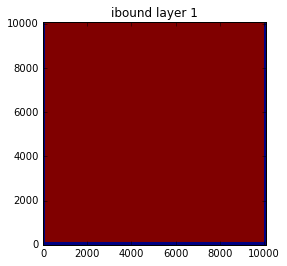

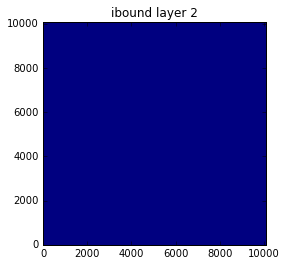

In [7]:
# let's look at the ibound 
ml.bas6.ibound.plot();

In [8]:
# well in layer 2 at 50, 50, -1000
spd = [[1, 50, 50, -1000.]]
wel = flopy.modflow.ModflowWel(ml, 
                               stress_period_data=spd)

In [9]:
# solver
pcg = flopy.modflow.ModflowPcg(ml)

In [10]:
# output control
oc = flopy.modflow.ModflowOc(ml)

In [11]:
ml.write_input()

In [12]:
ml.run_model(silent=False)

FloPy is using the following executable to run the model: /Users/jdhughes/Documents/Training/SWIM2016Course/bin/mf2005.mac

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.11.00 8/8/2013                        

 Using NAME file: model1.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2016/06/29 10:52:40

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2016/06/29 10:52:40
 Elapsed run time:  0.065 Seconds

  Normal termination of simulation


(True, [])

In [13]:
# post process output
import os



In [14]:
fn = os.path.join('work', 'model1.hds')
print(fn)

work/model1.hds


In [15]:
hobj = flopy.utils.HeadFile(fn)
h = hobj.get_data()

(4000, 6000)

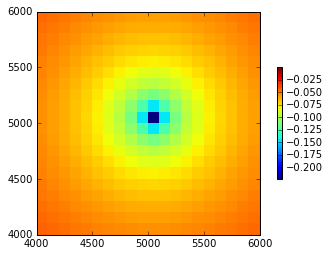

In [16]:
# create a simple map
mm = flopy.plot.ModelMap(model=ml, layer=1)
ha = mm.plot_array(h)
#mm.plot_grid()
#mm.plot_bc(ftype='WEL')
plt.colorbar(ha, shrink=0.5)
plt.xlim(4000, 6000)
plt.ylim(4000, 6000)

(4000, 6000)

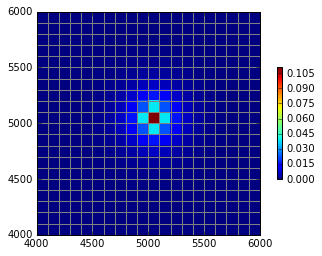

In [17]:
# create a simple map
d = h.copy()
d[0, :, :] = h[0, :, :] - h[1, :, :]
d[1, :, :] = h[1, :, :] - h[0, :, :]
mm = flopy.plot.ModelMap(model=ml, layer=0)
ha = mm.plot_array(d)
mm.plot_grid()
mm.plot_bc(ftype='WEL')
plt.colorbar(ha, shrink=0.5)
plt.xlim(4000, 6000)
plt.ylim(4000, 6000)

(4000, 6000)

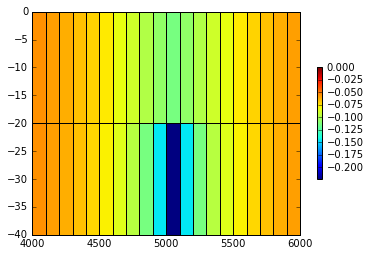

In [18]:
xs = flopy.plot.ModelCrossSection(model=ml, line={'column': 50})
ha = xs.plot_array(h)
plt.colorbar(ha, shrink=0.5)
plt.xlim(4000, 6000)